**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
vec = dir(txt_fdiry)
print(vec)

 [1] "region.annotation.encode_chromatin_states.tsv"    
 [2] "region.annotation.fcc_astarr_csaw.tsv"            
 [3] "region.annotation.fcc_crispri_hcrff.tsv"          
 [4] "region.annotation.genome_tss.tsv"                 
 [5] "region.annotation.hic_insitu_K562_ENCSR545YBD.tsv"
 [6] "region.annotation.hic_intact_K562_deep.tsv"       
 [7] "region.annotation.hic_intact_K562_ENCSR479XDG.tsv"
 [8] "region.summary.encode_chipseq_flagship.tsv"       
 [9] "region.summary.encode_chipseq_histone.tsv"        
[10] "region.summary.encode_chipseq_subset.tsv"         
[11] "region.summary.encode_chromatin_states.tsv"       
[12] "region.summary.fcc_astarr_csaw.tsv"               
[13] "region.summary.fcc_crispri_hcrff.tsv"             
[14] "region.summary.genome_tss.tsv"                    
[15] "region.summary.hic_insitu_K562_ENCSR545YBD.tsv"   
[16] "region.summary.hic_intact_K562_deep.tsv"          
[17] "region.summary.hic_intact_K562_ENCSR479XDG.tsv"   


## Import data

In [5]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "region.annotation.hic_intact_K562_ENCSR479XDG.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat_region_import = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 160863     14


Chrom_A,ChromStart_A,ChromEnd_A,Chrom_B,ChromStart_B,ChromEnd_B,Name_B,Group_B,Label_B,Note_B,Region_A,Region_B,Annotation_A,Annotation_B
chr1,778233,779389,chr1,770000,780000,chr1:770000-780000|chr1:840000-850000,hic_intact,Loop_A,1156,chr1:778233-779389,chr1:770000-780000,fcc_astarr_macs_input_overlap,hic_intact_Loop_A_ENCSR479XDG
chr1,903783,905204,chr1,904000,906000,chr1:904000-906000|chr1:976000-978000,hic_intact,Loop_A,1204,chr1:903783-905204,chr1:904000-906000,fcc_astarr_macs_input_overlap,hic_intact_Loop_A_ENCSR479XDG
chr1,920937,921509,chr1,920000,925000,chr1:920000-925000|chr1:1060000-1065000,hic_intact,Loop_A,572,chr1:920937-921509,chr1:920000-925000,fcc_astarr_macs_input_overlap,hic_intact_Loop_A_ENCSR479XDG


**Check**

In [7]:
table(dat$Label_B)


Loop_A Loop_B    TAD 
 46906  47071  66886 

## Arrange

In [9]:
dat = dat_region_import
dat = dat %>% 
    dplyr::select(
        Chrom_A, ChromStart_A, ChromEnd_A, Region_A, 
        Chrom_B, ChromStart_B, ChromEnd_B, Region_B, Name_B, Label_B) %>%
    dplyr::distinct()

###
tmp = dat %>% 
    dplyr::select(Chrom_A, ChromStart_A, ChromEnd_A, Region_A) %>% 
    dplyr::distinct()
dat_region_A = tmp

###
tmp = dat %>% 
    dplyr::select(Chrom_B, ChromStart_B, ChromEnd_B, Region_B, Name_B) %>%
    dplyr::distinct() 
dat_region_B = tmp

###
tmp = dat %>% dplyr::filter(Label_B %in% c("Loop_A", "Loop_B"))
dat_region_loop = tmp

###
tmp = dat %>% dplyr::filter(Label_B == "TAD")
dat_region_tad = tmp

## Ordering and filtering

In [19]:
###
dat = dat_region_A
dat = dat %>% dplyr::arrange(Chrom_A, ChromStart_A, ChromEnd_A)

### assign and show
vec_txt_region_A = dat$Region_A
print(length(vec_txt_region_A))

[1] 86828


In [20]:
###
dat = dat_region_B
dat = dat %>%
    dplyr::group_by(Name_B) %>%
    dplyr::summarize(
        Chrom_B    = unique(Chrom_B),
        ChromLoc_B = mean(ChromStart_B)
    ) %>%
    dplyr::arrange(Chrom_B, ChromLoc_B)

### assign and show
vec_txt_region_B = dat$Name_B
print(length(vec_txt_region_B))

[1] 47243


In [23]:
###
dat = dat_region_loop
dat = dat %>%
    dplyr::group_by(Name_B) %>%
    dplyr::summarise(
        Label = paste(sort(unique(Label_B)), collapse = "|"),
        Count = n()
    ) %>%
    dplyr::filter(Label == "Loop_A|Loop_B")

### assign and show
dat_region_loop_filter = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 32312     3


Name_B,Label,Count
chr10:1.1e+08-110010000|chr10:110200000-110210000,Loop_A|Loop_B,4
chr10:100338000-100339000|chr10:100433000-100434000,Loop_A|Loop_B,2
chr10:100340000-100350000|chr10:100870000-100880000,Loop_A|Loop_B,4


In [24]:
###
dat = dat_region_tad
dat = dat %>%
    dplyr::group_by(Name_B) %>%
    dplyr::summarise(
        Label = paste(sort(unique(Label_B)), collapse = "|"),
        Count = n()
    ) %>%
    dplyr::filter(Count > 1)

### assign and show
dat_region_tad_filter = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 4255    3


Name_B,Label,Count
chr10:1.2e+07-12125000,TAD,10
chr10:100540000-100885000,TAD,13
chr10:101485000-101570000,TAD,7


## Matrix

In [29]:
###
dat = dat_region_loop_filter
vec = dat$Name_B

###
dat = dat_region_loop 
dat = dat %>% 
    dplyr::select(Chrom_A, ChromStart_A, ChromEnd_A, Region_A, Name_B) %>%
    dplyr::filter(Name_B %in% vec)

###
dat = dat %>% dplyr::left_join(dat_region_loop_filter, by="Name_B")

###
vec = vec_txt_region_A
dat = dat %>% 
    dplyr::mutate(Region_A = factor(Region_A, levels=vec)) %>%
    dplyr::arrange(Region_A)

vec = vec_txt_region_B
dat = dat %>% dplyr::mutate(Name_B = factor(Name_B, levels=vec)) %>%
    dplyr::arrange(Name_B)

###
head(dat)

Chrom_A,ChromStart_A,ChromEnd_A,Region_A,Name_B,Label,Count
<chr>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<int>
chr1,778233,779389,chr1:778233-779389,chr1:770000-780000|chr1:840000-850000,Loop_A|Loop_B,3
chr1,842516,843431,chr1:842516-843431,chr1:770000-780000|chr1:840000-850000,Loop_A|Loop_B,3
chr1,849583,850403,chr1:849583-850403,chr1:770000-780000|chr1:840000-850000,Loop_A|Loop_B,3
chr1,903783,905204,chr1:903783-905204,chr1:904000-906000|chr1:976000-978000,Loop_A|Loop_B,2
chr1,975975,976656,chr1:975975-976656,chr1:904000-906000|chr1:976000-978000,Loop_A|Loop_B,2
chr1,920937,921509,chr1:920937-921509,chr1:920000-925000|chr1:1060000-1065000,Loop_A|Loop_B,5


In [28]:
mat = dat %>% tidyr::spread(Name_B, Value)
head(mat)

Chrom_A,ChromStart_A,ChromEnd_A,Region_A,chr1:770000-780000|chr1:840000-850000,chr1:904000-906000|chr1:976000-978000,chr1:920000-925000|chr1:1060000-1065000,chr1:984000-985000|chr1:1063000-1064000,chr1:1e+06-1005000|chr1:1060000-1065000,chr1:1020000-1025000|chr1:1060000-1065000,⋯,chrX:154804000-154806000|chrX:154840000-154842000,chrX:154760000-154765000|chrX:155070000-155075000,chrX:154918000-154920000|chrX:154980000-154982000,chrX:154918000-154919000|chrX:155057000-155058000,chrX:154981000-154982000|chrX:155057000-155058000,chrX:154980000-154982000|chrX:155086000-155088000,chrX:154980000-154990000|chrX:155170000-155180000,chrX:155070000-155072000|chrX:155216000-155218000,chrX:154915000-154920000|chrX:155820000-155825000,chrX:154980000-154982000|chrX:155820000-155822000
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,778233,779389,chr1:778233-779389,1,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr1,842516,843431,chr1:842516-843431,1,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr1,849583,850403,chr1:849583-850403,1,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr1,903783,905204,chr1:903783-905204,NA,1,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr1,975975,976656,chr1:975975-976656,NA,1,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr1,920937,921509,chr1:920937-921509,NA,NA,1,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
%>%
    tidyr::spread(Region_A, Name_B)

In [25]:
dat = dat_region_loop_filter
vec = dat$


dat = dat_region_loop 
dat = dat %>% 
    dplyr::select(Chrom_A, ChromStart_A, ChromEnd_A, Region_A, Name_B) %>%


dat = dat %>% 
    dplyr::filter(Name_B %in% vec_txt_region_B_filter) %>%
    dplyr::mutate(Value = 1) %>%
    
    dplyr::distinct() 

vec = vec_txt_region_A
dat = dat %>% dplyr::mutate(Region_A = factor(Region_A, levels=rev(vec)))

vec = vec_txt_region_B
dat = dat %>% dplyr::mutate(Name_B = factor(Name_B, levels=vec))

head(dat)

Chrom_A,ChromStart_A,ChromEnd_A,Region_A,Chrom_B,ChromStart_B,ChromEnd_B,Region_B,Name_B,Label_B
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,778233,779389,chr1:778233-779389,chr1,770000,780000,chr1:770000-780000,chr1:770000-780000|chr1:840000-850000,Loop_A
chr1,903783,905204,chr1:903783-905204,chr1,904000,906000,chr1:904000-906000,chr1:904000-906000|chr1:976000-978000,Loop_A
chr1,920937,921509,chr1:920937-921509,chr1,920000,925000,chr1:920000-925000,chr1:920000-925000|chr1:1060000-1065000,Loop_A
chr1,923427,925161,chr1:923427-925161,chr1,920000,925000,chr1:920000-925000,chr1:920000-925000|chr1:1060000-1065000,Loop_A
chr1,979401,980599,chr1:979401-980599,chr1,980000,990000,chr1:980000-990000,chr1:980000-990000|chr1:1290000-1300000,Loop_A
chr1,984073,984542,chr1:984073-984542,chr1,984000,985000,chr1:984000-985000,chr1:984000-985000|chr1:1063000-1064000,Loop_A


In [16]:
###
dat = dat_region_loop
dat = dat %>%
    dplyr::group_by(Name_B) %>%
    dplyr::summarise(
        Label = paste(sort(unique(Label_B)), collapse = "|"),
        Count = n()
    ) %>%
    dplyr::filter(Label == "Loop_A|Loop_B")

dat_region_loop_filter = dat

### assign and show
vec_txt_region_loop        = unique(dat_region_loop$Name_B)
vec_txt_region_loop_filter = dat$Name_B

print(length(vec_txt_region_loop))
print(length(vec_txt_region_loop_filter))
fun_display_table(head(dat, 3))

[1] 42923
[1] 10732


Name_B,Label,Count
chr10:1.1e+08-110010000|chr10:110200000-110210000,Loop_A|Loop_B,4
chr10:100340000-100350000|chr10:100870000-100880000,Loop_A|Loop_B,4
chr10:100515000-100520000|chr10:100875000-100880000,Loop_A|Loop_B,3


In [17]:
###
dat = dat_region_tad
dat = dat %>%
    dplyr::group_by(Name_B) %>%
    dplyr::summarise(
        Label = paste(sort(unique(Label_B)), collapse = "|"),
        Count = n()
    ) %>%
    dplyr::filter(
        Count > 1
    )

### assign and show
vec_txt_region_tad        = unique(dat_region_tad$Name_B)
vec_txt_region_tad_filter = dat$Name_B

print(length(vec_txt_region_tad))
print(length(vec_txt_region_tad_filter))
fun_display_table(head(dat, 3))

[1] 4320
[1] 4255


Name_B,Label,Count
chr10:1.2e+07-12125000,TAD,10
chr10:100540000-100885000,TAD,13
chr10:101485000-101570000,TAD,7


## Plot

In [86]:
dat = dat_region_loop
dat = dat %>% 
    dplyr::filter(Chrom_A == "chrX") %>% 
    dplyr::filter(Name_B %in% vec_txt_region_B_filter) %>%
    dplyr::mutate(Value = 1) %>%
    dplyr::distinct() 

vec = vec_txt_region_A
dat = dat %>% dplyr::mutate(Region_A = factor(Region_A, levels=rev(vec)))

vec = vec_txt_region_B
dat = dat %>% dplyr::mutate(Name_B = factor(Name_B, levels=vec))

dat_region_simplify = dat
head(dat)

Chrom_A,ChromStart_A,ChromEnd_A,Region_A,Chrom_B,ChromStart_B,ChromEnd_B,Region_B,Name_B,Label_B,Value
<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<dbl>
chrX,11134949,11135960,chrX:11134949-11135960,chrX,11135000,11140000,chrX:11135000-11140000,chrX:11135000-11140000|chrX:11770000-11775000,Loop_A,1
chrX,11138795,11139358,chrX:11138795-11139358,chrX,11135000,11140000,chrX:11135000-11140000,chrX:11135000-11140000|chrX:11770000-11775000,Loop_A,1
chrX,11152241,11152476,chrX:11152241-11152476,chrX,11150000,11160000,chrX:11150000-11160000,chrX:11150000-11160000|chrX:11260000-11270000,Loop_A,1
chrX,11159190,11159535,chrX:11159190-11159535,chrX,11150000,11160000,chrX:11150000-11160000,chrX:11150000-11160000|chrX:11260000-11270000,Loop_A,1
chrX,11461148,11462157,chrX:11461148-11462157,chrX,11460000,11470000,chrX:11460000-11470000,chrX:11460000-11470000|chrX:11770000-11780000,Loop_A,1
chrX,11464833,11465367,chrX:11464833-11465367,chrX,11460000,11470000,chrX:11460000-11470000,chrX:11460000-11470000|chrX:11770000-11780000,Loop_A,1


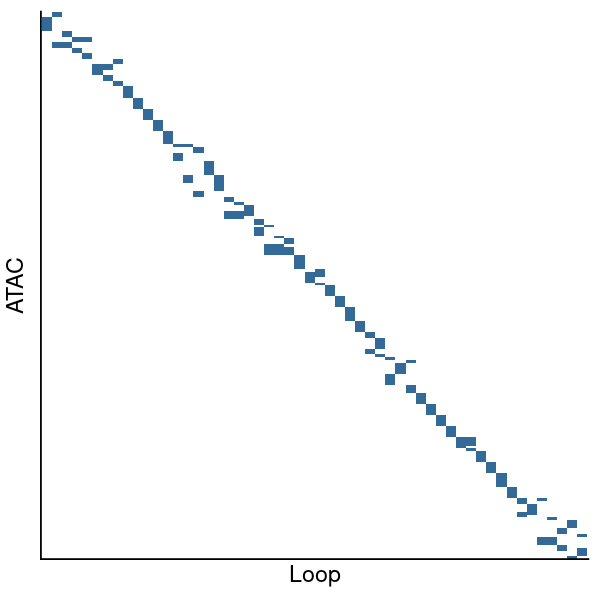

In [87]:
gpt = ggplot(dat, aes(x=Name_B, y=Region_A, fill=Value)) +
    geom_tile() + 
    labs(x="Loop", y="ATAC") +
    theme_cowplot() +
    theme(
        axis.text  = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "None"
    )

options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)